# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [3]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data['Gender'] == 'Male']
female_df = data.loc[data['Gender'] == 'Female']

male_df_weight = male_df[['Weight']]
male_df_height = male_df[['Height']]
female_df_weight = female_df[['Weight']]
female_df_height = female_df[['Height']]

male_df_weight_mean = male_df[['Weight']].mean()
male_df_weight_sd = male_df[['Weight']].std()
male_df_height_mean = male_df[['Height']].mean()
male_df_height_sd = male_df[['Height']].std()

female_df_weight_mean = female_df[['Weight']].mean()
female_df_weight_sd = female_df[['Weight']].std()
female_df_height_mean = female_df[['Height']].mean()
female_df_height_sd = female_df[['Height']].std()

np.array(male_df_height)

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [67.01379497],
       [71.55771849],
       [70.35187988]])

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


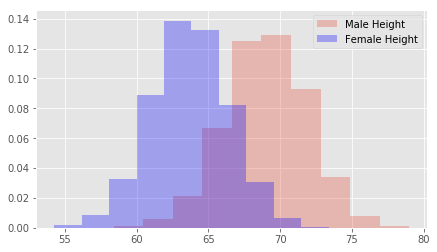

In [4]:
plt.figure(figsize = (7,4))
plt.hist(np.array(male_df_height), bins = 10, normed = True, alpha = 0.3, label = 'Male Height')
plt.hist(np.array(female_df_height), bins = 10, normed = True, alpha = 0.3, color = 'blue', label = 'Female Height')
plt.legend()
plt.show()         

In [5]:
# Record your observations - are these inline with your personal observations?
# Yes, women do tend to be shorter than men overall.

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

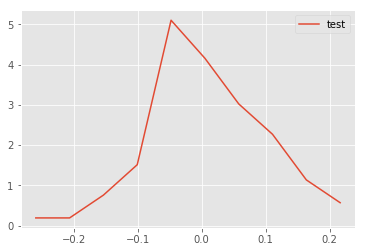

In [6]:
def density(x):
    x, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(x.size)
    pdfy = np.zeros(x.size)
    for k in range(x.size):
        pdfx[k] = 0.5*(bins[k] + bins[k+1])
        pdfy[k] = x[k]
    return pdfx,pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


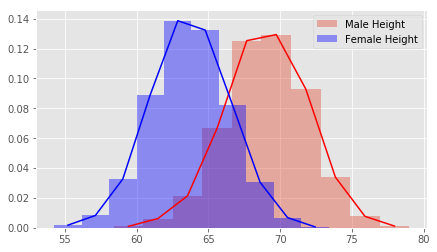

In [7]:
# You code here 

x,y = density(male_df_height)
a,b = density(female_df_height)

plt.figure(figsize = (7,4))
plt.hist(np.array(male_df_height), bins = 10, normed = True, alpha = 0.4, label = 'Male Height')
plt.hist(np.array(female_df_height), bins = 10, normed = True, alpha = 0.4, color = 'blue', label = 'Female Height')
plt.plot(x,y, color = 'red')
plt.plot(a,b, color ='blue')
plt.legend()

plt.show()


#### Repeat above exerice for male and female weights

In [8]:
# Your code here 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


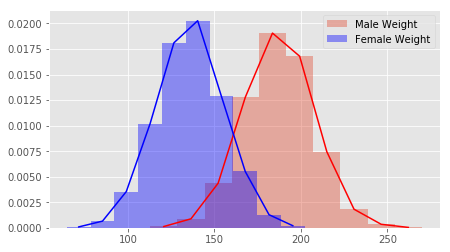

In [9]:
x,y = density(male_df_weight)
a,b = density(female_df_weight)

plt.figure(figsize = (7,4))
plt.hist(np.array(male_df_weight), bins = 10, normed = True, alpha = 0.4, label = 'Male Weight')
plt.hist(np.array(female_df_weight), bins = 10, normed = True, alpha = 0.4, color = 'blue', label = 'Female Weight')
plt.plot(x,y, color = 'red')
plt.plot(a,b, color ='blue')
plt.legend()

plt.show()

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


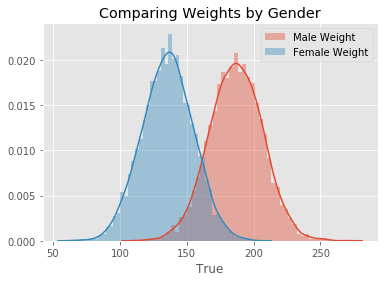

In [30]:
import seaborn as sns

ax = sns.distplot(np.array(male_df_weight),bins = 50, hist = True, label = 'Male Weight', kde= True, 
                  norm_hist = True, axlabel = True)
ax = sns.distplot(np.array(female_df_weight),bins = 50, hist = True, label = 'Female Weight', kde= True, norm_hist = True)
ax.set_title('Comparing Weights by Gender')
ax.legend()

Text(0.5,1,'Comparing Weights')

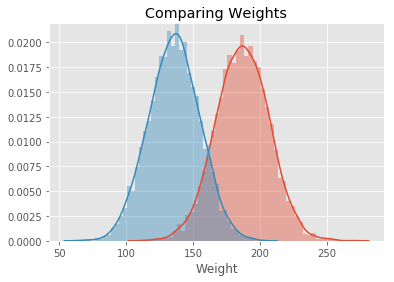

In [ ]:
# Your comments on the two approaches here. 
## plotting with seaborn was more effiecient - able to plot all histograms and KDE without having
## to write a separate function to calculate the densities
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.